In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 64) (64,)


In [4]:
import numpy

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.040254485 0.21344535


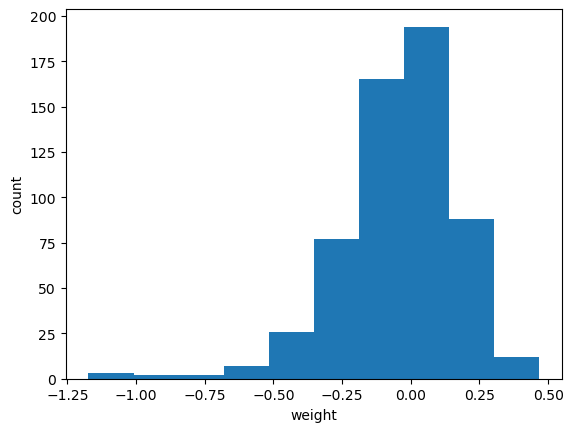

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' #라이브러리 충돌 방지

import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

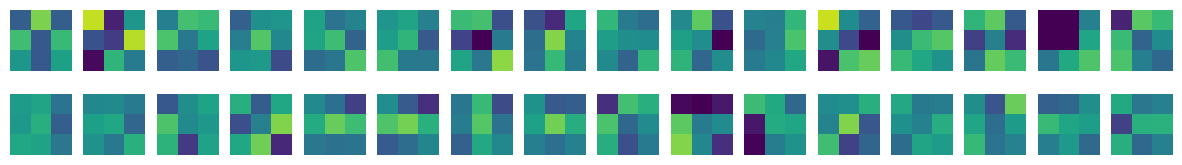

In [8]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

In [10]:
# 훈련되지 않은 모델 
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', input_shape=(28, 28, 1), activation='relu')) 

In [11]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape, no_training_conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [13]:
no_training_conv_weights = no_training_conv.weights[0].numpy()
print(no_training_conv_weights.mean(), no_training_conv_weights.std())

-0.001625366 0.078235246


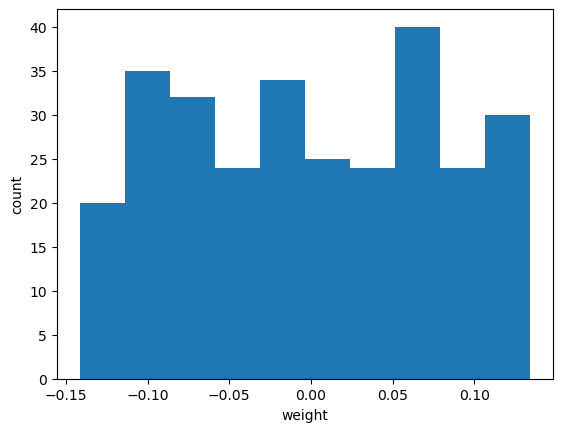

In [14]:
plt.hist(no_training_conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

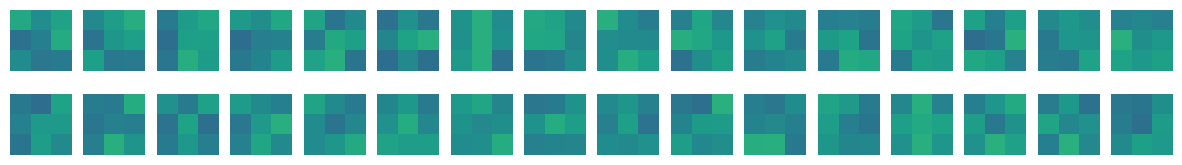

In [15]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_conv_weights[:, :, 0, i * 16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()